In [1]:
# Preamble
import HARK.ConsumptionSaving.ConsPortfolioModel as cpm
import HARK.ConsumptionSaving.ConsumerParameters as param
import copy
import matplotlib.pyplot as plt
import numpy as np
from HARK.ConsumptionSaving.ConsPortfolioModel import PortfolioSolution

In [2]:
# Set up the model and its parameters

# Create distribution of risky returns

Avg = 1.08 # equity premium 
Std = 0.15 # standard deviation of rate-of-return shocks

RiskyDstnFunc = cpm.RiskyDstnFactory(RiskyAvg=Avg, RiskyStd=Std) # Generates nodes for integration
RiskyDrawFunc = cpm.LogNormalRiskyDstnDraw(RiskyAvg=Avg, RiskyStd=Std) # Generates draws from the "true" distribution


# Make a dictionary to specify the rest of params
dict_portfolio = { 
                   # Usual params
                   'CRRA': 10,
                   'Rfree': 1.02,
                   'DiscFac': 0.96,
                    
                   # Life cycle
                   'T_age' : 11, # Time of death
                   'T_cycle' : 10, # Simulation timeframe
                   'T_retire':8,
                   'LivPrb': [1,1,1,1,1,1,1,1,1,1],
                   'PermGroFac': [1,1,1,1,1,1,1,1,1,1],
        
                   # Income shocks
                   'PermShkStd': [0.1,0.2,0.1,0.2,0.1,0.2,0.1,0,0,0],
                   'PermShkCount': 7,
                   'TranShkStd': [0.3,0.2,0.1,0.3,0.2,0.1,0.3,0,0,0],
                   'TranShkCount': 7,
                   'UnempPrb': 0,
                   'UnempPrbRet': 0,
                   'IncUnemp': 0,
                   'IncUnempRet': 0,
                   'BoroCnstArt': 0,
                   'tax_rate':0.0,
                   
                    # Portfolio related params
                   'approxRiskyDstn': RiskyDstnFunc,
                   'drawRiskyFunc': RiskyDrawFunc,
                   'RiskyCount': 10,
                   'RiskyShareCount': 30,
                  
                   # Grid stuff? 
                   'aXtraMin': 0.001,
                   'aXtraMax': 20,
                   'aXtraCount': 48,
                   'aXtraExtra': [None],
                   'aXtraNestFac': 3,
                   
                   # General
                   'vFuncBool': False,
                   'CubicBool': False
}

agent = cpm.PortfolioConsumerType(**dict_portfolio)

In [3]:
# Solution
agent.solve()

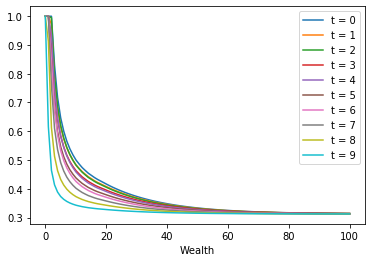

In [4]:
# Plot portfolio rule
eevalgrid = np.linspace(0,100,100)

# In the last period of life you consume everything
# so portfolio choice is irrelevant
for i in range(len(agent.solution)-1):
    plt.plot(eevalgrid, agent.solution[i].RiskyShareFunc[0][0](eevalgrid),
             label = 't = %i' %(i))
plt.xlabel('Wealth')
plt.legend()